# Product comparison

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Agulhas results </u> </center></h1>  
    


<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Agulhas region.</center></h5> 

## <u> Compared products </u> 

<h3>
    <ul>  
        <li> GlobCurrent Geostrophic REP </li> 
        <li> GlobCurrent Total REP </li>
        <li> WOC BFN-QG </li>
        <li> WOC inertial global </li>
    </ul>  

</h3>

In [1]:
from glob import glob
import numpy as np
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore")
sys.path.remove('/Users/sammymetref/Documents/DataChallenges/DC_IW_crossoverCal/2022a_mapping_HFdynamic')

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>

## <u> 1. Spectrum </u> 

In [5]:
dir_spectrum = '../dc_data/results-woc/spectrum/'

name_plot = 'Spectrum_Agulhas.png'

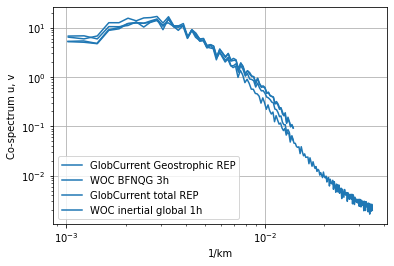

In [6]:
list_spectrum_pickles = glob(dir_spectrum+'*region_T1_*')

spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot)

<br>

<br>

<br>

## <u> 2. Eulerian RMS </u>

<br>

<h3>Mean error</h3>

In [7]:
dir_eulerian = '../dc_data/results-woc/eulerian_analyse_pickle/'

In [8]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_008_047_00/Eulerian_RMS_mean_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_RMS_mean_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_00/Eulerian_RMS_mean_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'}] 

utils.DictTable(list_dict)  

Mean,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.185,0.175,0.181,84.718,0.328,0.318,0.467,0.543,38.514
GlobCurrents Total,0.166,0.169,0.166,77.047,0.362,0.325,0.495,0.554,34.434
BFN-QG,0.179,0.180,0.183,95.679,0.335,0.323,0.467,0.542,40.735


<br>

<br>

<h3>Standard deviation error</h3>

In [9]:

list_dict = [{'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_008_047_00/Eulerian_RMS_std_008_047.pyo','name':'GlobCurrents Geostrophic'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_cmems_015_004_00/Eulerian_RMS_std_015_004.pyo','name':'GlobCurrents Total'},
             {'type_stat':'std','path':dir_eulerian+'eulerian_rms_T1_woc-l4-curgeo-bfn-3h_00/Eulerian_RMS_std_woc-l4-curgeo-bfn-3h.pyo','name':'BFN-QG'}] 

utils.DictTable(list_dict)  

std,Eastward error,Northward error,Norm error,Direction error,Eastward speed,Northward speed,Field speed,Drifter speed,percentage
GlobCurrents Geostrophic,0.117,0.112,0.118,64.674,0.326,0.317,0.290,0.298,0.212
GlobCurrents Total,0.109,0.110,0.110,60.797,0.355,0.325,0.288,0.299,0.192
BFN-QG,0.113,0.114,0.116,75.547,0.334,0.322,0.287,0.291,0.226


<br>

<br>

## <u> 3. Lagrangian Cumulative Distance</u>  (at 15m)

In [10]:
dir_drifter = '../dc_data/drifter_pickle/'

dir_lcd = '../dc_data/results-woc/fictive_trajectories/'

In [11]:
drifter_list = [dir_drifter + 'Drifters_AOML_region_T1_15m_20190101T000000Z_20200101T000000Z.pyo']

all_path_artificial_drifters = [dir_lcd + 'woc_advection_T1_008_047_15m/data_type_008_047_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_015_004_15m/data_type_cmems_015_004_daily_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_woc-l4-curgeo-bfn-3h_15m/data_type_woc-l4-curgeo-bfn-3h_region_T1.pyo',
                                dir_lcd + 'woc_advection_T1_woc-l4-cureul-glob-1h_15m/data_type_woc-l4-cureul-glob-1h_region_T1.pyo']

all_outputfilename = ['SDE_region_T1_008_047_15m',
                      'SDE_region_T1_015_004_15m',
                      'SDE_region_T1_woc-l4-curgeo-bfn-3h_15m',
                      'SDE_region_T1_woc-l4-cureul-glob-1h_15m']

for path_artificial_drifters, outputfilename in zip(all_path_artificial_drifters, all_outputfilename):
    
    print(outputfilename)

    _ = sde.run(path_artificial_drifters, drifter_list, output_dir=outputdir, output_filename=outputfilename)


SDE_region_T1_008_047_15m


100%|██████████| 1617/1617 [00:37<00:00, 43.11it/s]


SDE_region_T1_015_004_15m


100%|██████████| 1617/1617 [00:37<00:00, 43.08it/s]


SDE_region_T1_woc-l4-curgeo-bfn-3h_15m


100%|██████████| 1617/1617 [00:40<00:00, 39.45it/s]


SDE_region_T1_woc-l4-cureul-glob-1h_15m


100%|██████████| 1438/1438 [00:00<00:00, 16858.72it/s]


<Figure size 432x288 with 0 Axes>

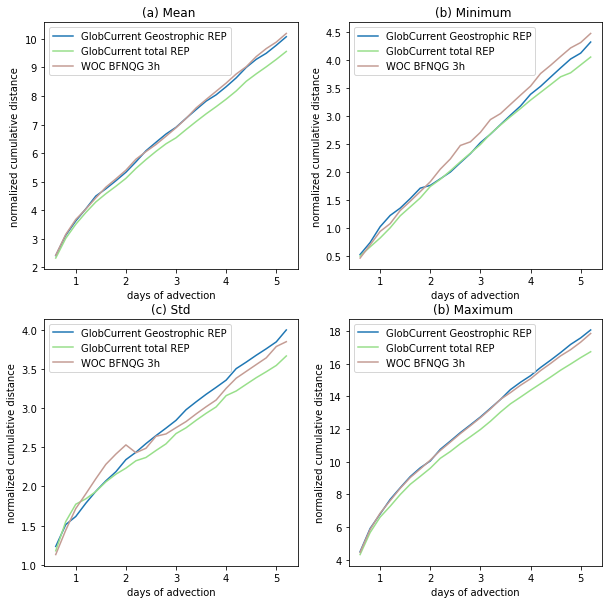

In [13]:
list_sde = [outputdir + output_filename + '.pyo' for output_filename in all_outputfilename][:-1]

outputfilename = 'SDE_region_T1_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, output_filename=outputfilename)

<br>

<br>

## <u>4. Fronts and currents consistency</u>

In [ ]:
dir_fronts = '../dc_data/results-woc/fronts_vel_comparison/'

No traceback available to show.


332
14
332
8.937580441379338e-05
0.002086119946779534


ERROR LENGTH 72165 4656
ERROR LENGTH 72165 4656
ERROR LENGTH 72165 4656


6.192268438138431e-05


SystemExit: 1

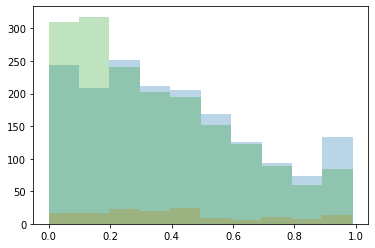

In [10]:

dic_list = box_metrics.run(dir_fronts+'config_fronts.json', 2, 
                first_date='20190101T000000Z',
                last_date ='20190115T000000Z',
                output_dir=outputdir, 
                plot=True)

In [ ]:
# Save results as a pdf file

! jupyter nbconvert --output-dir='../results'  nb_overall_results-Agulhas.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt
